In [1]:
# notebook import 

from ipynb.fs.full.data_processing import *

In [2]:
# user input parameters

# boolean parameter to dictate whether figures are saved
save = False

# boolean parameter to dictate whether figures are plotted with the point at start point
start = False

# boolean parameter to dictate whether figures are plotted with the relative temperature
temp = False

# list of numbers over which the plot of mi will be averaged 
mi_avg_list = [0, 10, 20]

# the number over which the plot of temperature will be averaged 
temp_avg = 1000

# dictionary mapping each plotted line to its corresponding color in figures
colors = {'gfp':'green', 'rfp':'red', 'area':'blue', 'temp':'gray', 'start':'orange'}

In [6]:
# function declaration 

# input:
# output: None ()
def plot_mi_scatter(x_mi, y_mi, feature, x_temp=None, y_temp=None):
    plt.scatter(x_mi, y_mi, 3, color=colors[feature], label=f'{proper_feature[feature]} Mutual Information')
    
    if temp:
        plt.plot(x_temp, y_temp, color=colors['temp'], label='Relative Temperature')
    if start:
        plt.axvline(start_plot, color=colors['start'], linestyle='--', label='Start')
    
    plt.title(f'{proper_feature[feature]} mutual information as a function of time')
    plt.xlabel('Time (s)')
    plt.ylabel('Mutual Information')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if save:
        plt.savefig(results_fpath+mi_calc_ext+f'/mi_plots/{feature}_mi_scatter{ext}.png', dpi=300,  bbox_inches='tight')
        
    plt.show()
    return

# input:
# output: None ()
def plot_mi_line(x_mi, y_mi, num, feature, x_temp=None, y_temp=None):
    x_mi, y_mi = avg_plot(x_mi, y_mi, num)
    plt.plot(x_mi, y_mi, color=colors[feature], label=f'{proper_feature[feature]} Mutual Information')
    
    if temp:
        plt.plot(x_temp, y_temp, color=colors['temp'], label='Relative Temperature')
    if start:
        plt.axvline(start_plot, color=colors['start'], linestyle='--', label='Start')
    
    plt.title(f'{proper_feature[feature]} mutual information as a function of time')
    plt.xlabel('Time (s)')
    plt.ylabel('Mutual Information')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if save:
        plt.savefig(results_fpath+mi_calc_ext+f'/mi_plots/{feature}_mi_line_{num}{ext}.png', dpi=300,  bbox_inches='tight')
    
    plt.show()
    return


In [9]:
# `main()` function declaration

# intended use in coordination with ...
# requires: import of `data_processing.ipynb` and user input parameters specified above
# output: None (plots the temperature over time)

def main():
    
    # declare global variable ext for filepath of saved figure
    global ext
    ext = ''
    if temp:
        ext += f'_temp_{temp_avg}'
        scaled_temp = scale(temp_series, feature_series, temp_series)
        x_temp, y_temp = avg_plot(temp_secs, scaled_temp, temp_avg)
    if start:
        ext += '_start'
        
    for feature in feature_name_list:
        
        # find and read data files
        feature_series = pd.read_csv(results_fpath+mi_calc_ext+f'{feature}_mi_list.csv')['mi']

        # plot
        if temp:
            plot_mi_scatter(timestep_scaled, feature_series, feature, x_temp, y_temp)
        else:
            plot_mi_scatter(timestep_scaled, feature_series, feature)

        for num in mi_avg_list:
            if temp:
                plot_mi_line(timestep_scaled, feature_series, num, feature, x_temp, y_temp)
            else:
                plot_mi_line(timestep_scaled, feature_series, num, feature)
    
    return 

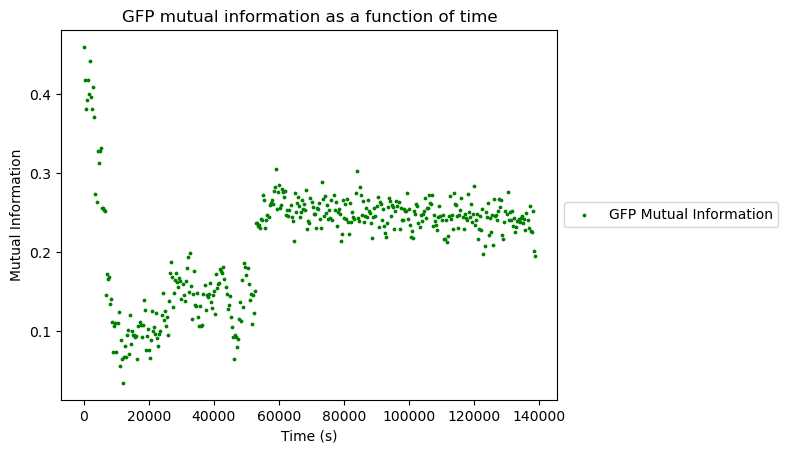

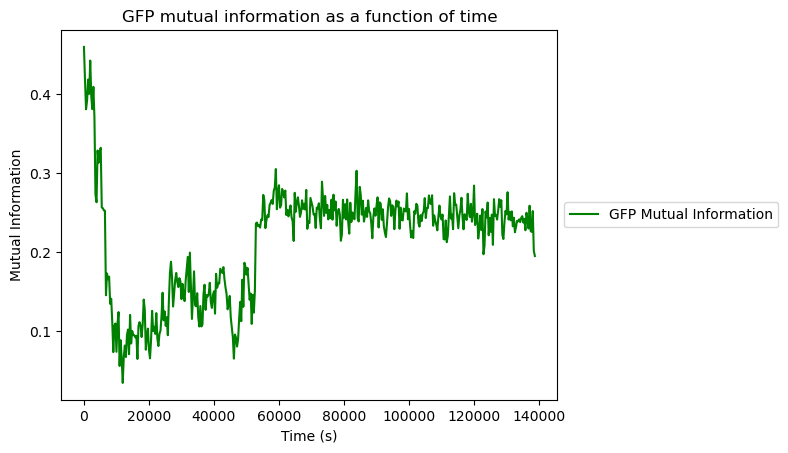

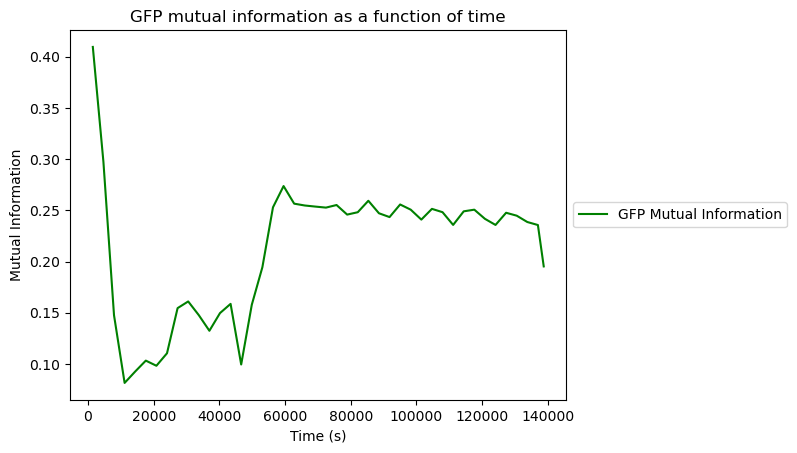

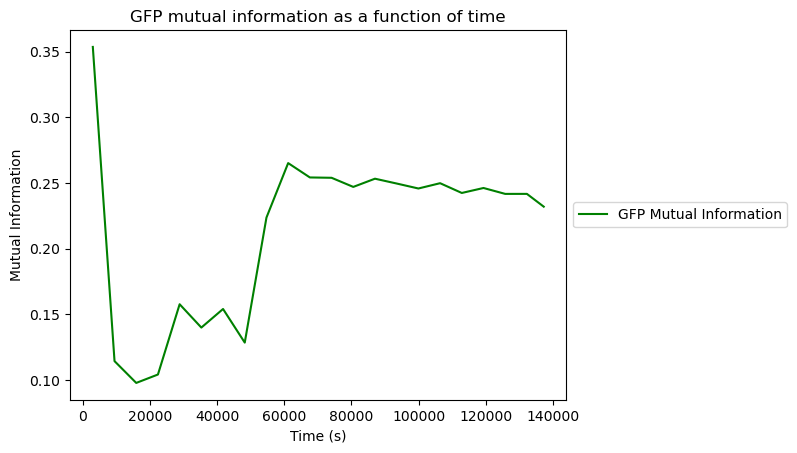

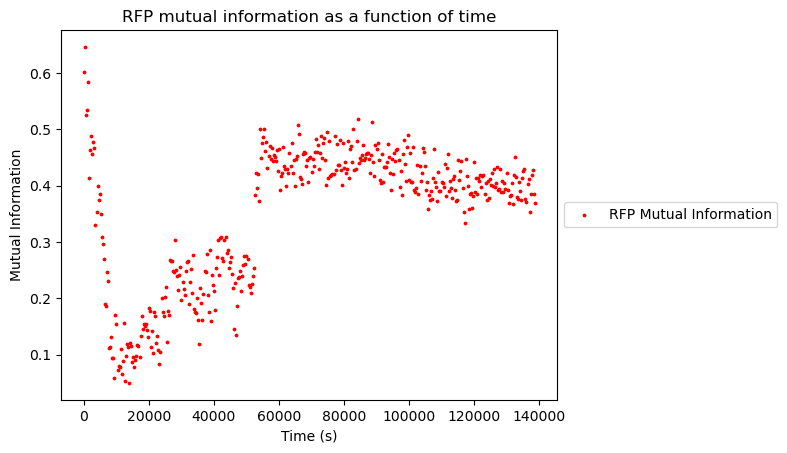

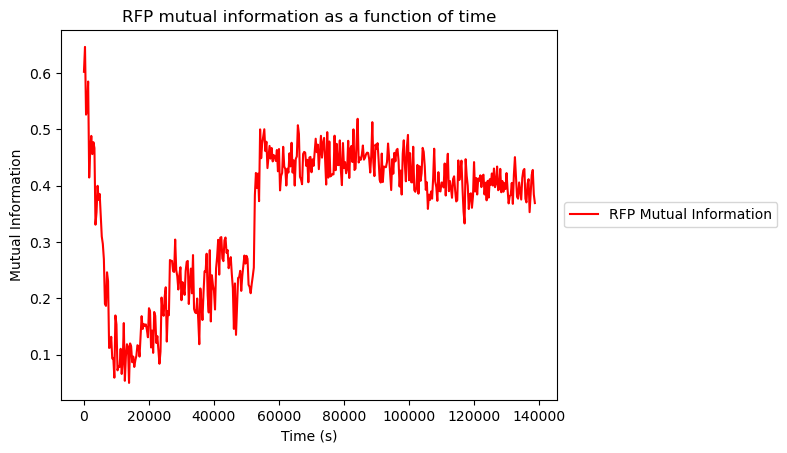

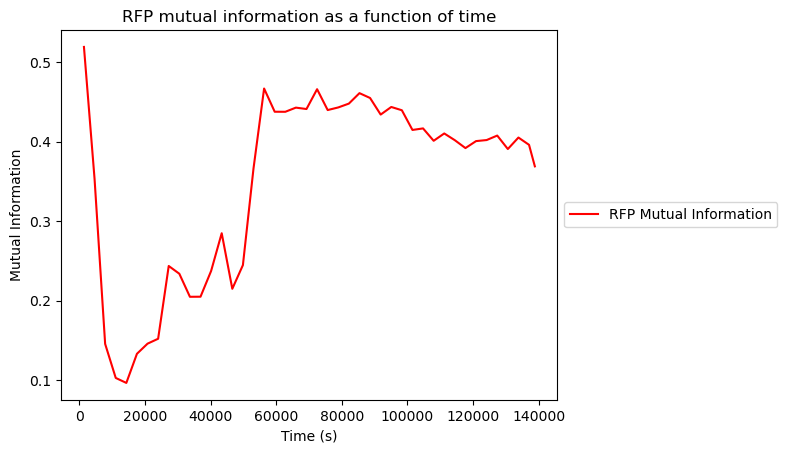

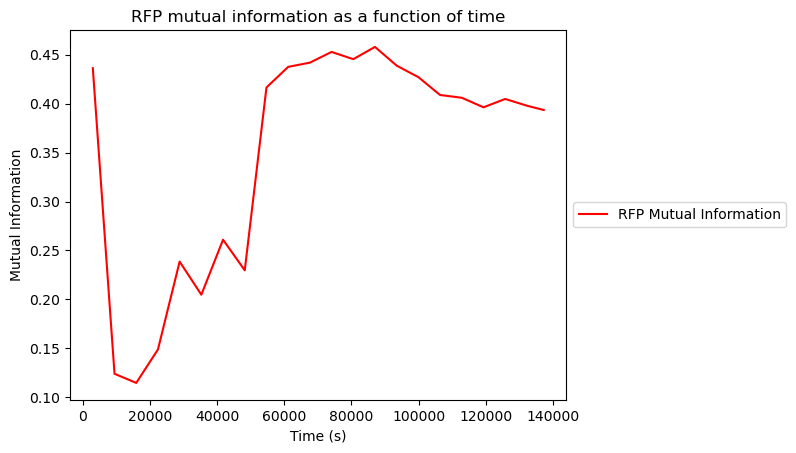

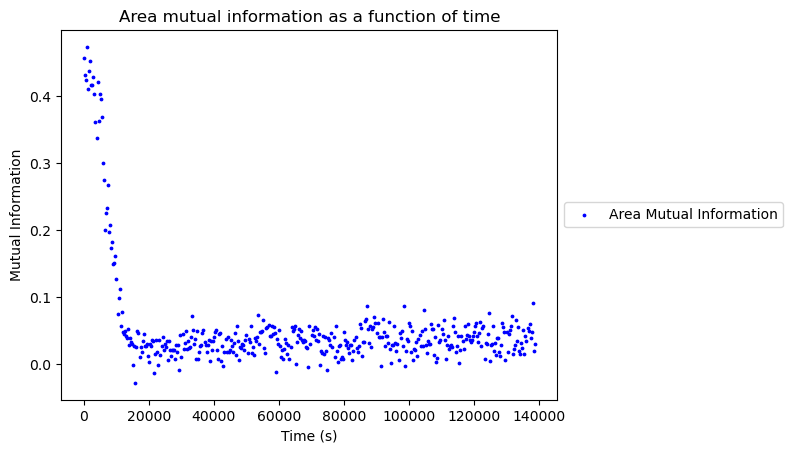

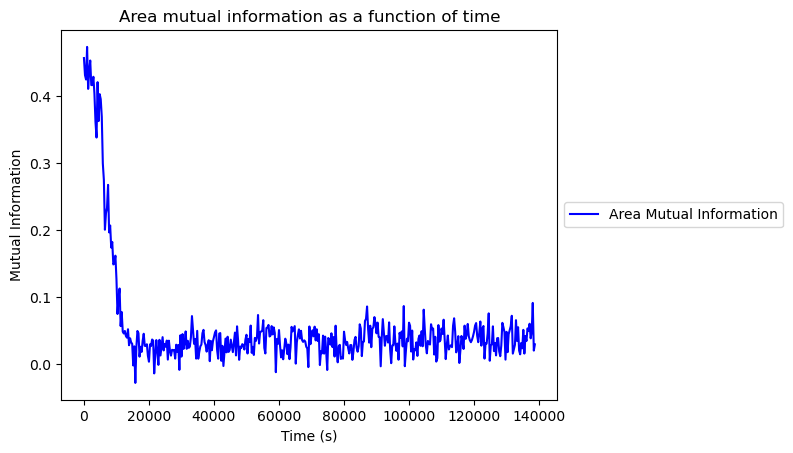

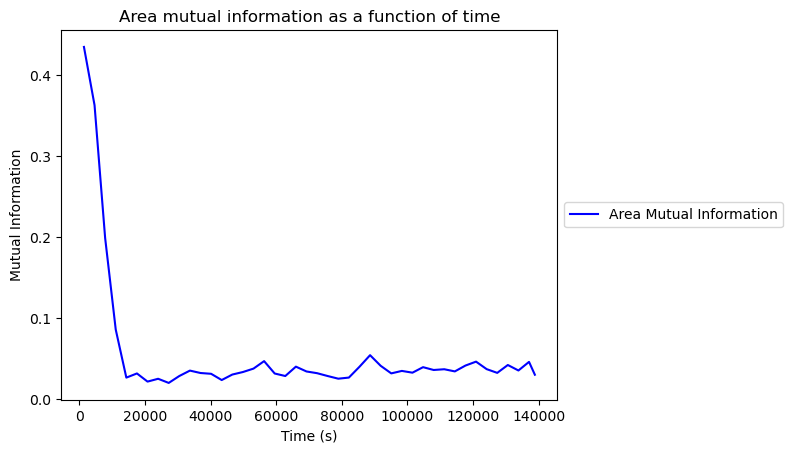

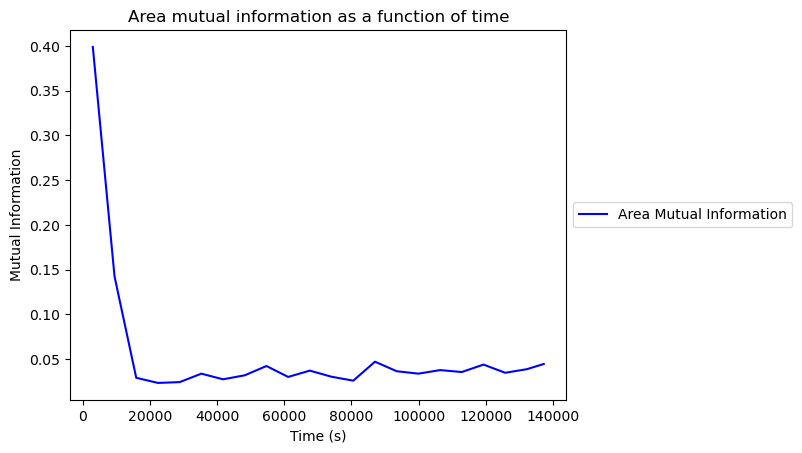

In [10]:
# call to `main()` function

main()